### Bonanzaa-LTER Gradient Soil Data Pre-processing 

Summary

Author: 

Date: 

In [52]:
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

List of urls for EML Thaw Gradient Sites from 2004-2018

DOI: http://dx.doi.org/10.6073/pasta/29d79cf984929bc247173268c3785eca
Soil Temperature data measured at depths (10,20,30 and 40cm) in soil at the Eight Mile Lake (EML) permafrost thaw gradient site.This script is designed to read in, standardize and merge individual files into one final csv file containing all years (2004-2018). 

In [2]:
urls=["https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2004_2007.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2015_2016.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientExtSoilSensor_2017_2018.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2004_2009.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2015_2016.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientMinSoilSensor_2017_2018.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2004.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2008_2009.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2010_2013.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2013_2014.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2014_2015.txt"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2016_2017.csv"
     ,"https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/517_EML_AK_GradientModSoilSensor_2017_2018.csv"]

First read in each csv from the list above, call in each column name, and specify Na-values (-9999, NaN). This takes a moment to run since the datafiles are half hourly

In [3]:
dflist=[]
for i in range(len(urls)):
    df=pd.read_csv(urls[i]
          ,skiprows=1
            ,sep=","  
           , names=[
                    "site",     
                    "date",     
                    "year",     
                    "doy",     
                    "hour",     
                    "loc1_5cm",     
                    "loc1_10_cm",     
                    "loc1_20_cm",     
                    "loc1_30cm",     
                    "loc1_40cm",     
                    "empty1",     
                    "loc2_5cm",     
                    "loc2_10cm",     
                    "loc2_20cm",     
                    "loc2_30cm",     
                    "loc2_40cm",     
                    "empty2",     
                    "loc3_5cm",     
                    "loc3_10cm",     
                    "loc3_20cm",     
                    "loc3_30cm",     
                    "loc3_40cm"    ]
,na_values={
                  'loc1_5cm':[
                          '-9999',],
                  'loc1_10_cm':[
                          '-9999',],
                  'loc1_20_cm':[
                          '-9999',],
                  'loc1_30cm':[
                          '-9999',],
                  'loc1_40cm':[
                          '-9999',],
                  'loc2_5cm':[
                          '-9999',],
                  'loc2_10cm':[
                          '-9999',],
                  'loc2_20cm':[
                          '-9999',],
                  'loc2_30cm':[
                          '-9999',],
                  'loc2_40cm':[
                          '-9999',],
                  'loc3_5cm':[
                          '-9999',],
                  'loc3_10cm':[
                          '-9999',],
                  'loc3_20cm':[
                          '-9999',],
                  'loc3_30cm':[
                          '-9999',],
                  'loc3_40cm':[
                          '-9999',],} 
            
    )
    dflist.append(df)

/Users/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


To get summary of missing values within each dataset, get info

In [4]:
for k in dflist:
    print(k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69707 entries, 0 to 69706
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   site        69707 non-null  object 
 1   date        69707 non-null  object 
 2   year        69707 non-null  int64  
 3   doy         69707 non-null  int64  
 4   hour        69707 non-null  int64  
 5   loc1_5cm    0 non-null      float64
 6   loc1_10_cm  64708 non-null  object 
 7   loc1_20_cm  64626 non-null  float64
 8   loc1_30cm   64708 non-null  float64
 9   loc1_40cm   64708 non-null  float64
 10  empty1      0 non-null      float64
 11  loc2_5cm    0 non-null      float64
 12  loc2_10cm   64582 non-null  float64
 13  loc2_20cm   64708 non-null  float64
 14  loc2_30cm   64708 non-null  float64
 15  loc2_40cm   64626 non-null  float64
 16  empty2      0 non-null      float64
 17  loc3_5cm    0 non-null      float64
 18  loc3_10cm   11904 non-null  float64
 19  loc3_20cm   64562 non-nul

In [13]:
dflist[0]['loc1_10_cm'].asarray()

AttributeError: 'Series' object has no attribute 'asarray'

In [5]:
dflist[0].describe()

,year,doy,hour,loc1_5cm,loc1_20_cm,loc1_30cm,loc1_40cm,empty1,loc2_5cm,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
count,69707.000000,69707.000000,69707.000000,0.0,64626.000000,64708.000000,64708.000000,0.0,0.0,64582.000000,64708.000000,64708.000000,64626.000000,0.0,0.0,11904.000000,64562.000000,64708.000000,56995.000000
mean,2005.950622,183.027601,1215.843603,NaN,0.001591,-0.448332,-0.734006,NaN,NaN,0.506504,-0.395097,-0.708084,-0.967312,NaN,NaN,-0.805078,0.701375,0.190466,-0.002046
std,1.218280,105.791672,693.085125,NaN,4.773154,3.739303,3.039193,NaN,NaN,6.153557,4.414758,3.480067,2.867634,NaN,NaN,1.532668,4.196360,2.968397,2.524306
min,2004.000000,1.000000,30.000000,NaN,-13.270000,-12.060000,-11.200000,NaN,NaN,-17.300000,-15.060000,-13.340000,-12.200000,NaN,NaN,-5.600000,-11.240000,-9.750000,-8.530000
25%,2005.000000,91.000000,630.000000,NaN,-2.534000,-1.925250,-1.555000,NaN,NaN,-3.190000,-2.634000,-2.162000,-1.830000,NaN,NaN,-1.700000,-1.293000,-0.735250,-0.604000
50%,2006.000000,184.000000,1230.000000,NaN,-0.170000,-0.116000,-0.080000,NaN,NaN,-0.275000,-0.204000,-0.103000,-0.100000,NaN,NaN,-0.130000,0.020000,0.002000,0.082000
75%,2007.000000,275.000000,1800.000000,NaN,3.645000,1.772500,0.638000,NaN,NaN,5.372750,2.829250,1.264000,0.517000,NaN,NaN,0.240000,3.827000,1.590250,1.202000
max,2008.000000,366.000000,2400.000000,NaN,11.100000,7.630000,5.678000,NaN,NaN,18.080000,10.330000,7.610000,5.397000,NaN,NaN,2.490000,14.170000,8.520000,6.671000


In [12]:
dflist[0].iloc[1:3]

,site,date,year,doy,hour,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,...,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
1,EXT,5/7/2004 12:00,2004,128,1200,NaN,2.434,-0.436,-0.611,-0.726,...,1.625,-0.350,-0.662,-0.816,NaN,NaN,NaN,NaN,-0.564,-0.692
2,EXT,5/7/2004 14:00,2004,128,1400,NaN,2.502,-0.333,-0.517,-0.637,...,1.659,-0.218,-0.585,-0.731,NaN,NaN,NaN,NaN,-0.427,-0.581


Print a list of the site names available within each dataset to see if naming is uniform across each dataset

In [16]:
for l in dflist:
    print(l['site'].unique())    

['EXT']
['EXT' nan]
['Ext']
['Ext']
['Extensive']
['Extensive']
['Extensive']
['min']
['min' nan]
['Min']
['Min']
['Minimal']
['Minimal']
['Minimal']
['mod']
['mod']
['mod' nan]
['Mod']
['Mod']
['Moderate']
['Moderate']


Site categories are not uniform, need to replace abbreviations in order to create uniform naming conventiona cross all datasets.Once labeling is unform, concatenate each dataframe

In [17]:
for e in dflist:
    e['site']=e['site'].replace({'EXT':'Extensive','Ext':'Extensive','min':'Minimal','Min':'Minimal'
                                ,'mod':'Moderate','Mod':'Moderate'})
    emldf=pd.concat(dflist)

emldf.head()

,site,date,year,doy,hour,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,...,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
0,Extensive,5/7/2004 10:00,2004,128,1000,NaN,2.56,0.046,-0.150,-0.304,...,1.922,0.080,-0.227,-0.398,NaN,NaN,NaN,NaN,-0.082,-0.244
1,Extensive,5/7/2004 12:00,2004,128,1200,NaN,2.434,-0.436,-0.611,-0.726,...,1.625,-0.350,-0.662,-0.816,NaN,NaN,NaN,NaN,-0.564,-0.692
2,Extensive,5/7/2004 14:00,2004,128,1400,NaN,2.502,-0.333,-0.517,-0.637,...,1.659,-0.218,-0.585,-0.731,NaN,NaN,NaN,NaN,-0.427,-0.581
3,Extensive,5/7/2004 16:00,2004,128,1600,NaN,2.403,-0.697,-0.851,-0.915,...,1.709,-0.441,-0.924,-1.010,NaN,NaN,NaN,NaN,-0.813,-0.911
4,Extensive,5/7/2004 18:00,2004,128,1800,NaN,2.39,-0.835,-0.942,-0.989,...,1.820,-0.484,-0.984,-1.036,NaN,NaN,NaN,NaN,-0.963,-1.014


Explore and visualise some of the values within each dataset..to ensure no values seem out of place

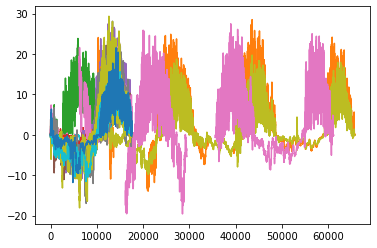

In [29]:
for j in dflist:
    j['loc1_5cm'].plot()

<AxesSubplot:>

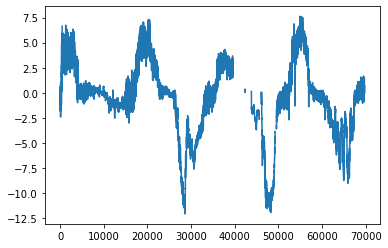

In [45]:
dflist[0]['loc1_30cm'].plot()

Convert date to datetime format, extract hour from datetime and print .head() to check. Make date an index

In [18]:
emldf.date = pd.to_datetime(emldf.date)
emldf = emldf.set_index('date')
emldf.head(3)

,site,year,doy,hour,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,empty1,...,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
date,,,,,,,,,,,,,,,,,,,,,
2004-05-07 10:00:00,Extensive,2004,128,1000,NaN,2.56,0.046,-0.150,-0.304,NaN,...,1.922,0.080,-0.227,-0.398,NaN,NaN,NaN,NaN,-0.082,-0.244
2004-05-07 12:00:00,Extensive,2004,128,1200,NaN,2.434,-0.436,-0.611,-0.726,NaN,...,1.625,-0.350,-0.662,-0.816,NaN,NaN,NaN,NaN,-0.564,-0.692
2004-05-07 14:00:00,Extensive,2004,128,1400,NaN,2.502,-0.333,-0.517,-0.637,NaN,...,1.659,-0.218,-0.585,-0.731,NaN,NaN,NaN,NaN,-0.427,-0.581


Let's drop the 'year', 'doy', 'hour' columns since they become redundant once we add the 'date' index. 

In [19]:
emldf.drop(['year', 'doy', 'hour'], axis=1, inplace=True)
emldf.head(2)

,site,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,empty1,loc2_5cm,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
date,,,,,,,,,,,,,,,,,,
2004-05-07 10:00:00,Extensive,NaN,2.56,0.046,-0.150,-0.304,NaN,NaN,1.922,0.08,-0.227,-0.398,NaN,NaN,NaN,NaN,-0.082,-0.244
2004-05-07 12:00:00,Extensive,NaN,2.434,-0.436,-0.611,-0.726,NaN,NaN,1.625,-0.35,-0.662,-0.816,NaN,NaN,NaN,NaN,-0.564,-0.692


In [55]:
emldf.describe()

,loc1_5cm,loc1_20_cm,loc1_30cm,loc1_40cm,empty1,loc2_5cm,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,empty2,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
count,376472.000000,591699.000000,591781.000000,591333.000000,97655.0,376131.000000,532834.000000,582805.000000,590696.000000,590446.000000,97655.0,376465.000000,540782.000000,593440.000000,591758.000000,583357.000000
mean,1.824389,0.541367,0.060233,-0.030125,-9999.0,1.644941,1.100080,0.049386,-0.468411,-0.447964,-9999.0,1.357192,1.079611,0.441870,0.058908,-0.031182
std,6.187325,3.872444,2.827736,2.973128,0.0,6.179280,5.365605,3.440505,2.565117,2.856427,0.0,4.980065,4.517872,3.165892,2.357211,2.376034
min,-19.580000,-18.920000,-13.160000,-18.080000,-9999.0,-20.930000,-20.850000,-16.590000,-13.340000,-13.270000,-9999.0,-16.090000,-15.520000,-13.490000,-11.750000,-16.090000
25%,-2.200000,-1.377000,-0.960000,-0.820000,-9999.0,-2.560000,-2.296000,-1.500000,-1.180000,-1.020000,-9999.0,-1.760000,-1.607000,-0.990000,-0.733000,-0.610000
50%,-0.090000,-0.080000,-0.110000,-0.110000,-9999.0,-0.175000,-0.100000,-0.140000,-0.180000,-0.160000,-9999.0,-0.100000,-0.070000,-0.060000,-0.090000,-0.090000
75%,6.160000,3.113000,1.440000,0.830000,-9999.0,6.340000,5.250000,2.430000,0.780000,0.497000,-9999.0,4.860000,4.350000,2.600000,1.170000,0.650000
max,29.340000,16.810000,12.040000,29.340000,-9999.0,32.740000,26.730000,16.640000,13.540000,29.680000,-9999.0,27.970000,22.320000,14.170000,10.260000,24.450000


In [59]:
emldf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639943 entries, 2004-05-07 10:00:00 to 2018-09-30 23:30:00
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   site        639940 non-null  object 
 1   loc1_5cm    376472 non-null  float64
 2   loc1_10_cm  492070 non-null  object 
 3   loc1_20_cm  591699 non-null  float64
 4   loc1_30cm   591781 non-null  float64
 5   loc1_40cm   591333 non-null  float64
 6   empty1      97655 non-null   float64
 7   loc2_5cm    376131 non-null  float64
 8   loc2_10cm   532834 non-null  float64
 9   loc2_20cm   582805 non-null  float64
 10  loc2_30cm   590696 non-null  float64
 11  loc2_40cm   590446 non-null  float64
 12  empty2      97655 non-null   float64
 13  loc3_5cm    376465 non-null  float64
 14  loc3_10cm   540782 non-null  float64
 15  loc3_20cm   593440 non-null  float64
 16  loc3_30cm   591758 non-null  float64
 17  loc3_40cm   583357 non-null  float64
dtypes: float64

After examining it further we find that columns 'empty1' and 'empty2' are useless. 

In [38]:
emldf.drop(['empty1', 'empty2'], axis=1, inplace=True)
emldf.head(2)

,site,loc1_5cm,loc1_10_cm,loc1_20_cm,loc1_30cm,loc1_40cm,loc2_5cm,loc2_10cm,loc2_20cm,loc2_30cm,loc2_40cm,loc3_5cm,loc3_10cm,loc3_20cm,loc3_30cm,loc3_40cm
date,,,,,,,,,,,,,,,,
2004-05-07 10:00:00,Extensive,NaN,2.56,0.046,-0.150,-0.304,NaN,1.922,0.08,-0.227,-0.398,NaN,NaN,NaN,-0.082,-0.244
2004-05-07 12:00:00,Extensive,NaN,2.434,-0.436,-0.611,-0.726,NaN,1.625,-0.35,-0.662,-0.816,NaN,NaN,NaN,-0.564,-0.692


In [39]:
emldf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639943 entries, 2004-05-07 10:00:00 to 2018-09-30 23:30:00
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   site        639940 non-null  object 
 1   loc1_5cm    376472 non-null  float64
 2   loc1_10_cm  492070 non-null  object 
 3   loc1_20_cm  591699 non-null  float64
 4   loc1_30cm   591781 non-null  float64
 5   loc1_40cm   591333 non-null  float64
 6   loc2_5cm    376131 non-null  float64
 7   loc2_10cm   532834 non-null  float64
 8   loc2_20cm   582805 non-null  float64
 9   loc2_30cm   590696 non-null  float64
 10  loc2_40cm   590446 non-null  float64
 11  loc3_5cm    376465 non-null  float64
 12  loc3_10cm   540782 non-null  float64
 13  loc3_20cm   593440 non-null  float64
 14  loc3_30cm   591758 non-null  float64
 15  loc3_40cm   583357 non-null  float64
dtypes: float64(14), object(2)
memory usage: 99.1+ MB


Convert object column to float

In [46]:
emldf['loc1_10_cm']  = emldf['loc1_10_cm'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [47]:
emldf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 639943 entries, 2004-05-07 10:00:00 to 2018-09-30 23:30:00
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   site        639940 non-null  object 
 1   loc1_5cm    376472 non-null  float64
 2   loc1_10_cm  492069 non-null  float64
 3   loc1_20_cm  591699 non-null  float64
 4   loc1_30cm   591781 non-null  float64
 5   loc1_40cm   591333 non-null  float64
 6   loc2_5cm    376131 non-null  float64
 7   loc2_10cm   532834 non-null  float64
 8   loc2_20cm   582805 non-null  float64
 9   loc2_30cm   590696 non-null  float64
 10  loc2_40cm   590446 non-null  float64
 11  loc3_5cm    376465 non-null  float64
 12  loc3_10cm   540782 non-null  float64
 13  loc3_20cm   593440 non-null  float64
 14  loc3_30cm   591758 non-null  float64
 15  loc3_40cm   583357 non-null  float64
dtypes: float64(15), object(1)
memory usage: 99.1+ MB


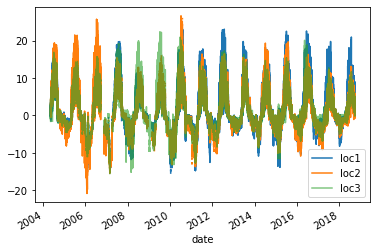

In [48]:
emldf['loc1_10_cm'].plot()
emldf['loc2_10cm'].plot()
emldf['loc3_10cm'].plot(alpha=0.6)
plt.legend(['loc1','loc2','loc3'])

<AxesSubplot:xlabel='date'>

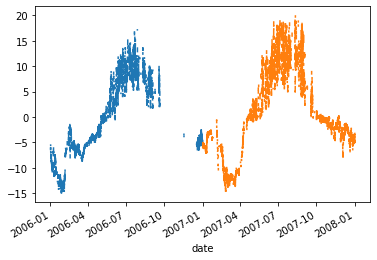

In [49]:
emldf['loc1_10_cm']['2006-01-01 10:00:00':'2007-01-01 10:00:00'].plot()
emldf['loc1_10_cm']['2007-01-01 10:00:00':'2008-01-01 10:00:00'].plot()

<AxesSubplot:xlabel='date'>

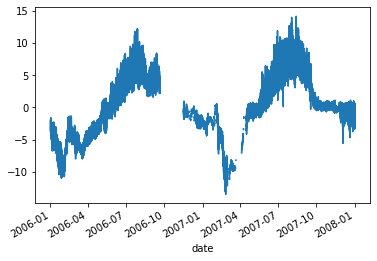

In [31]:
emldf['loc3_20cm']['2006-01-01 10:00:00':'2008-01-01 10:00:00'].plot()

Printout all unique years to ensure the dataset contains all datasets

After cleaning,merging the data, and re-indexing, we can now export the final concatenated csv file which contains soil moisture data from 2004-2018

In [51]:
emldf.to_csv('AK_EML_LTER_GradientSoil_2004_2018.csv')

Next step is to fill the gaps in the data
https://drnesr.medium.com/filling-gaps-of-a-time-series-using-python-d4bfddd8c460